-----
<center>
<h1 style="font-size: 50px; font-family: serif;">Fuel Consumption Ratings Regression !</h1>
</center>

---

## Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from scipy.stats import chi2_contingency

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


## DataFrame
<span id="Importdata"></span>

In [2]:
data = pd.read_csv(r"C:\Users\Darkp\Downloads\final_data.csv")
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,NaN
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         945 non-null    int64  
 1   Make                               945 non-null    object 
 2   Model                              945 non-null    object 
 3   Vehicle Class                      945 non-null    object 
 4   Engine Size(L)                     945 non-null    float64
 5   Cylinders                          945 non-null    int64  
 6   Transmission                       945 non-null    object 
 7   Fuel Type                          944 non-null    object 
 8   Fuel Consumption (City (L/100 km)  931 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   930 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  945 non-null    float64
 11  Fuel Consumption(Comb (mpg))       931 non-null    float64

In [4]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [5]:
data[['CO2 Rating','Smog Rating','CO2 Emissions(g/km)']].corr()

,CO2 Rating,Smog Rating,CO2 Emissions(g/km)
CO2 Rating,1.000000,0.503795,-0.955018
Smog Rating,0.503795,1.000000,-0.520441
CO2 Emissions(g/km),-0.955018,-0.520441,1.000000



<h1 style="font-size: 40px; font-family: serif;">Data cleaning</h1>

In [6]:
df= data.drop(['Model Year','Make','Model','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','Smog Rating'],axis=1)

**New DataFrame**

In [7]:
df

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS8,Z,9.4,5.0
941,SUV: Small,2.0,4,AS8,Z,9.4,5.0
942,SUV: Small,2.0,4,AS8,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS8,Z,10.1,5.0


In [8]:
df = df.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Cylinders': 'Cylinders', 'Transmission':'Transmission','Fuel Type':'Fuel Type', 'Fuel Consumption(Comb (L/100 km))':'Fuel Consumption', 'CO2 Rating':'CO2 Rating'})

In [9]:
df.isna().sum()

Vehicle Class        0
Engine Size          0
Cylinders            0
Transmission         0
Fuel Type            1
Fuel Consumption     0
CO2 Rating          13
dtype: int64

## Fuel type

In [10]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [11]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0


## CO2 Rating

In [12]:
df[['Fuel Consumption','CO2 Rating']].corr()

,Fuel Consumption,CO2 Rating
Fuel Consumption,1.00000,-0.92762
CO2 Rating,-0.92762,1.00000


In [13]:
df[['Fuel Consumption','CO2 Rating']].groupby('CO2 Rating').median()

,Fuel Consumption
CO2 Rating,
1.0,21.5
2.0,16.0
3.0,13.9
4.0,11.7
5.0,9.9
6.0,8.3
7.0,7.3
8.0,6.0
9.0,4.8


In [14]:
df['CO2 Rating'].fillna(0,inplace=True)
new_ratting = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    if co2==0:
        if 20 <= fuel:
            new_ratting.append(1)
        elif 16.0 <= fuel < 20.0:
            new_ratting.append(2) 
        elif 14.0 <= fuel < 16.0: 
            new_ratting.append(3)
        elif 12.0 <= fuel < 14.0: 
            new_ratting.append(4)
        elif 10.0 <= fuel < 12.0: 
            new_ratting.append(5)
        elif 8.0 <= fuel < 10.0: 
            new_ratting.append(6)
        elif 7.0 <= fuel < 8.0: 
            new_ratting.append(7)
        elif 6.0 <= fuel < 7.0: 
            new_ratting.append(8)
        elif 5.0 <= fuel < 6.0: 
            new_ratting.append(9)
        elif fuel < 5.0: 
            new_ratting.append(10)            
    else:
        new_ratting.append(co2)
        
        
df['CO2 Rating'] = new_ratting

In [15]:
df.isna().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

## Checking the correlation

In [16]:
df.corr()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
Engine Size,1.000000,0.920672,0.818655,-0.766032
Cylinders,0.920672,1.000000,0.821719,-0.761408
Fuel Consumption,0.818655,0.821719,1.000000,-0.927449
CO2 Rating,-0.766032,-0.761408,-0.927449,1.000000


**Checking Corelation of each feature against target variable**

In [17]:
df.corr()["Fuel Consumption"].to_frame()

,Fuel Consumption
Engine Size,0.818655
Cylinders,0.821719
Fuel Consumption,1.000000
CO2 Rating,-0.927449


## Simplifying the columns

In [18]:
df = df.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M',\
                                   'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
df

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM,Z,8.6,6.0
1,SUV: Small,3.5,6,AS,Z,11.2,4.0
2,SUV: Small,2.0,4,AS,Z,9.9,5.0
3,SUV: Small,2.0,4,AS,Z,10.3,5.0
4,Compact,2.0,4,AS,Z,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS,Z,9.4,5.0
941,SUV: Small,2.0,4,AS,Z,9.4,5.0
942,SUV: Small,2.0,4,AS,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS,Z,10.1,5.0


In [19]:
df['Transmission'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

## 3.1 Statistical Summary :
<span id="mean"></span>


In [20]:
df[['Engine Size','Cylinders','Fuel Consumption','CO2 Rating']].describe()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
count,945.000000,945.000000,945.000000,945.000000
mean,3.199683,5.669841,11.093439,4.542857
std,1.375231,1.932930,2.877491,1.471665
min,1.200000,3.000000,4.000000,1.000000
25%,2.000000,4.000000,9.100000,3.000000
50%,3.000000,6.000000,10.800000,5.000000
75%,3.800000,6.000000,12.900000,5.000000
max,8.000000,16.000000,26.100000,10.000000


## Frequency Distribution 


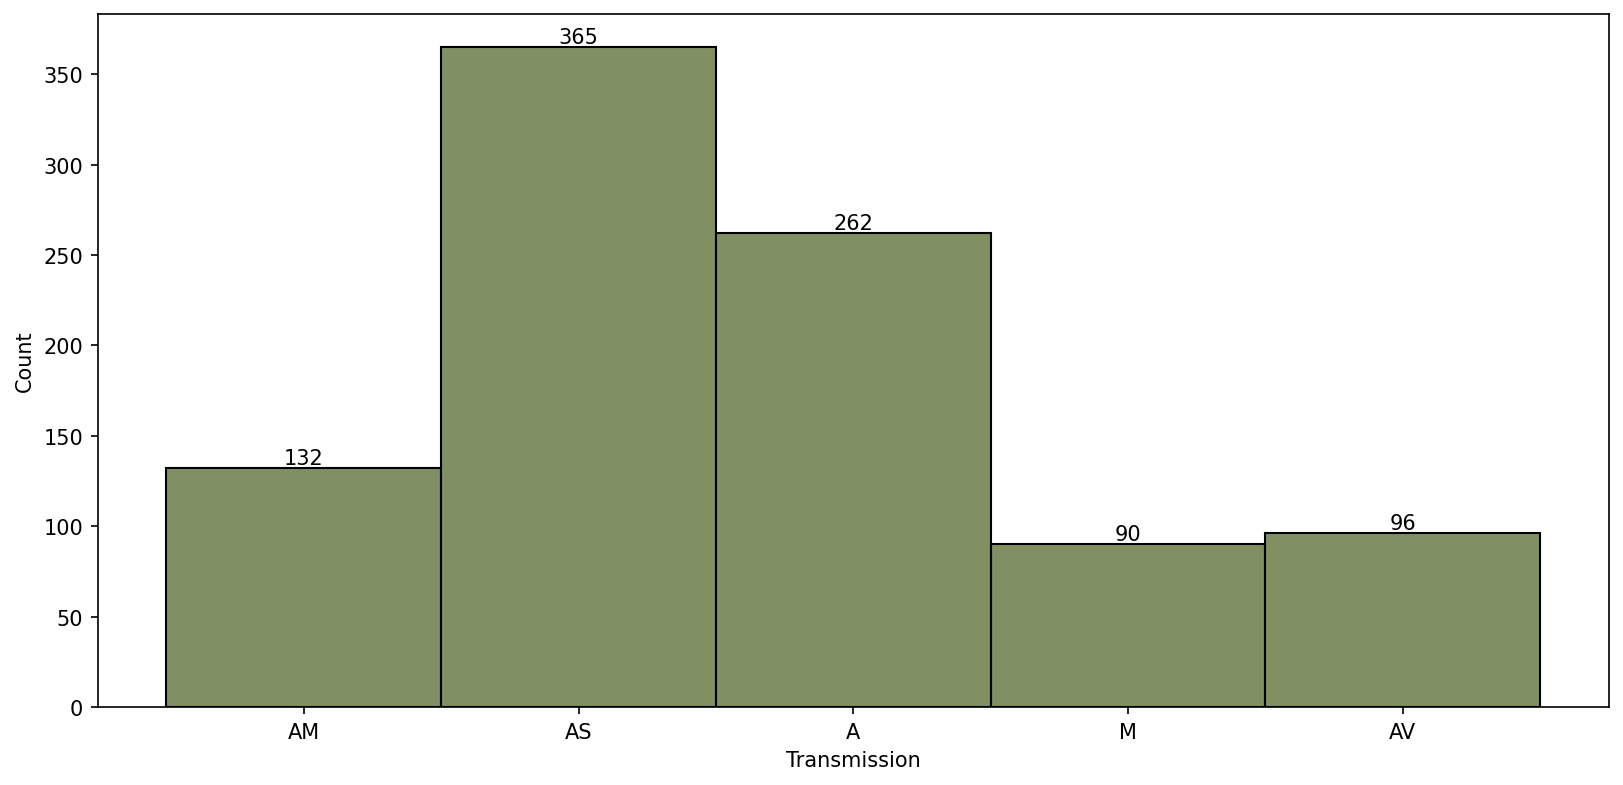

In [21]:
plt.figure(figsize=(13,6), dpi=150)
chart1=sns.histplot(data=df, x='Transmission', color='DarkOliveGreen')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

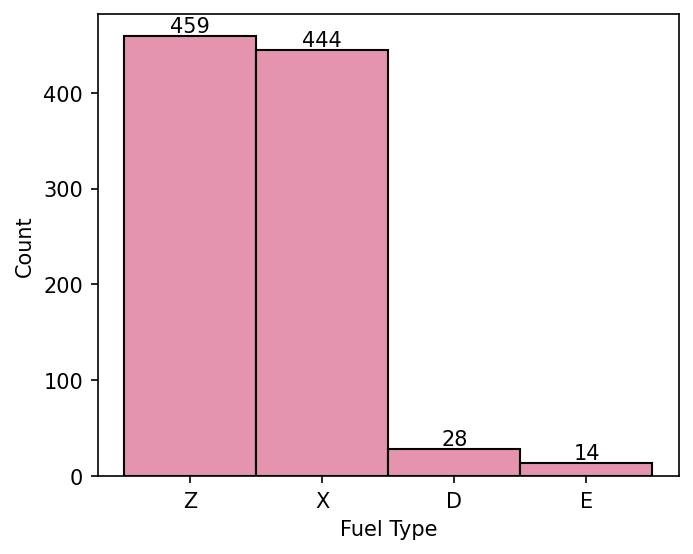

In [22]:
plt.figure(figsize=(5,4), dpi=150)
chart1=sns.histplot(data=df, x='Fuel Type', color='PaleVioletRed')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

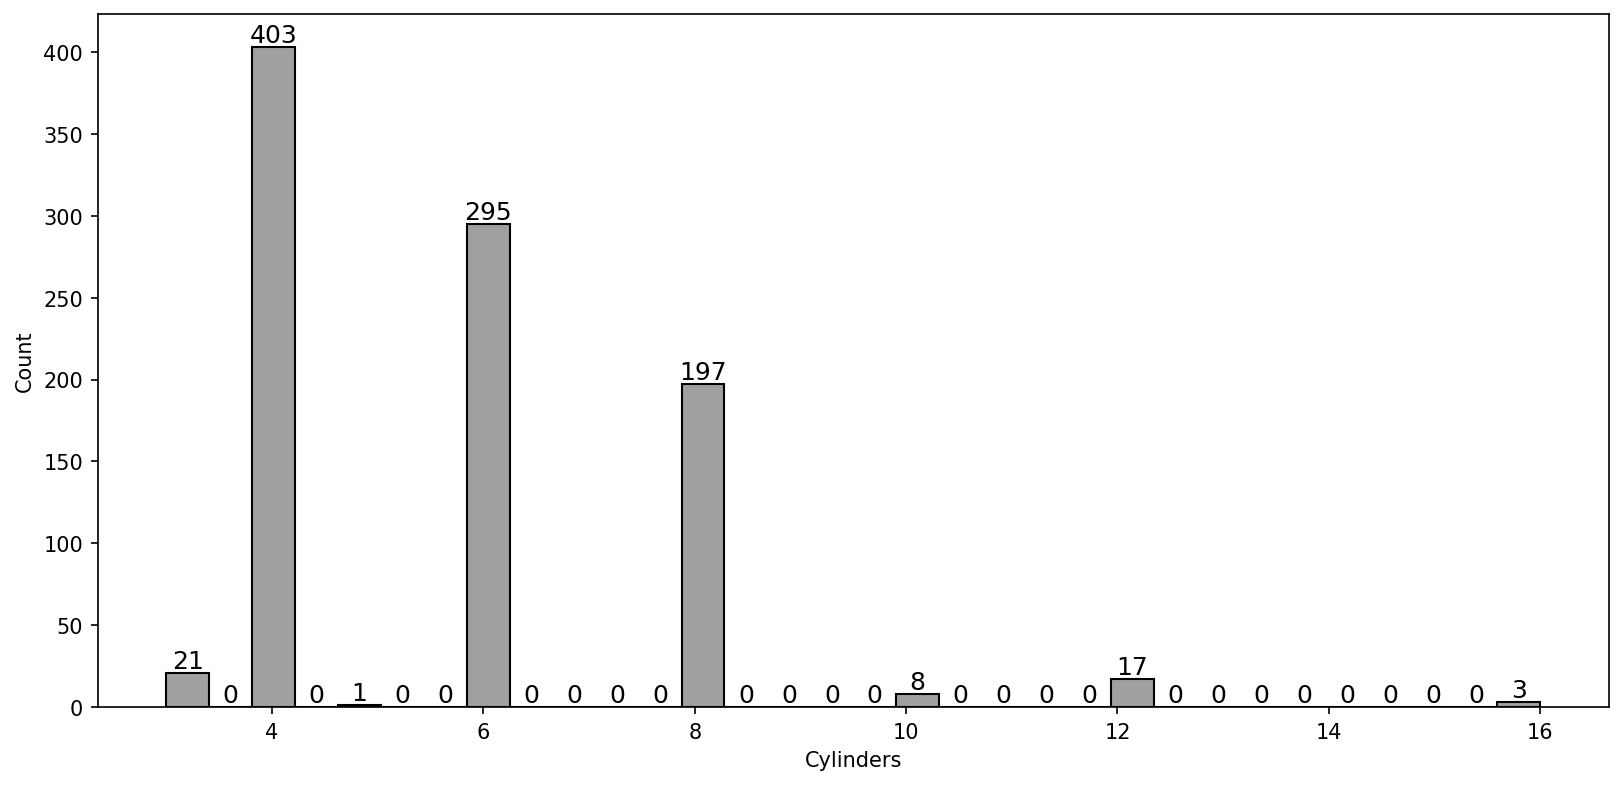

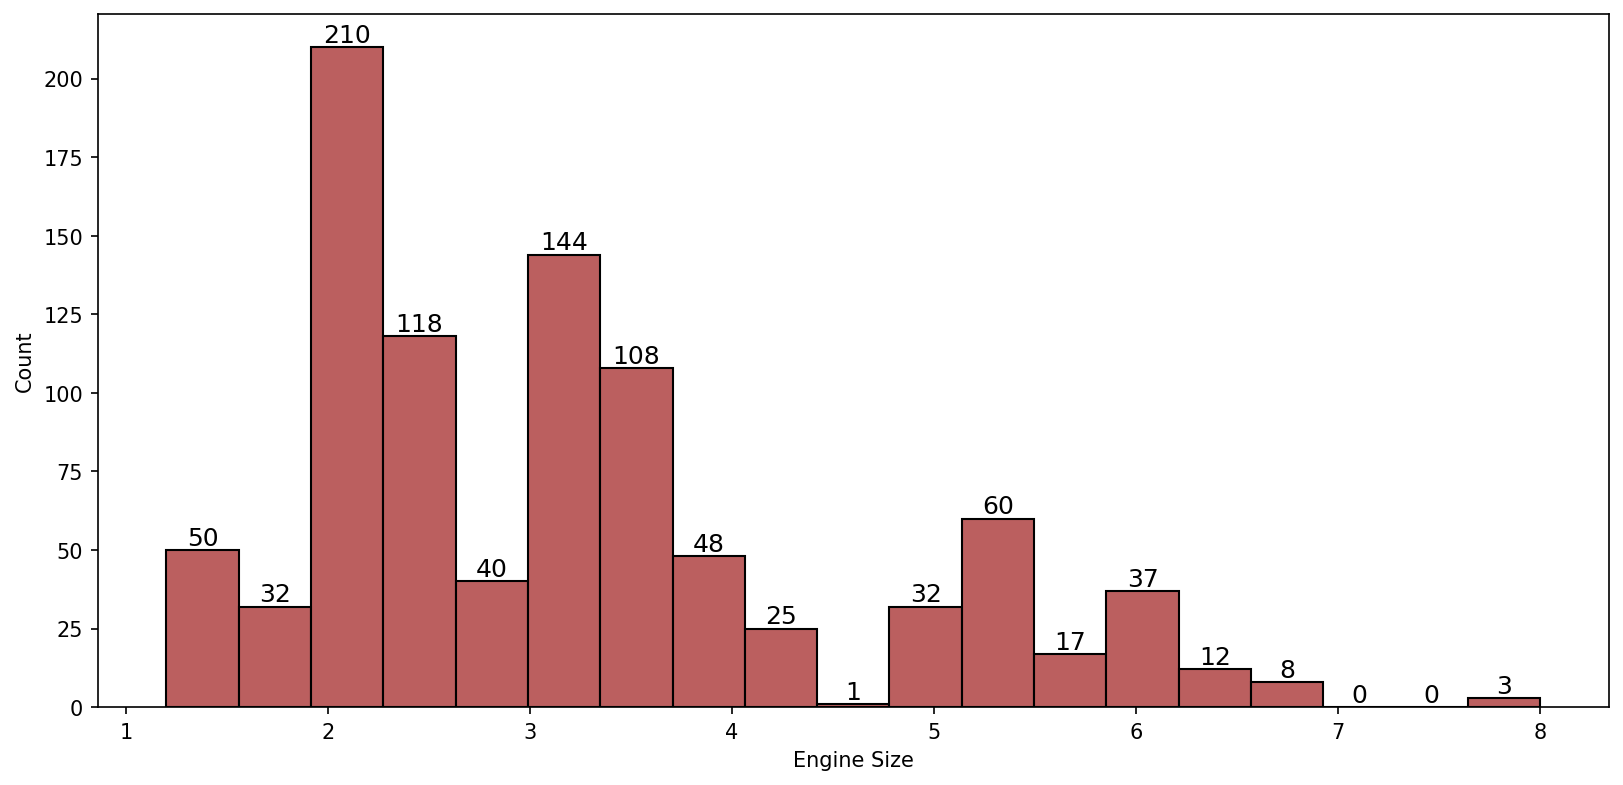

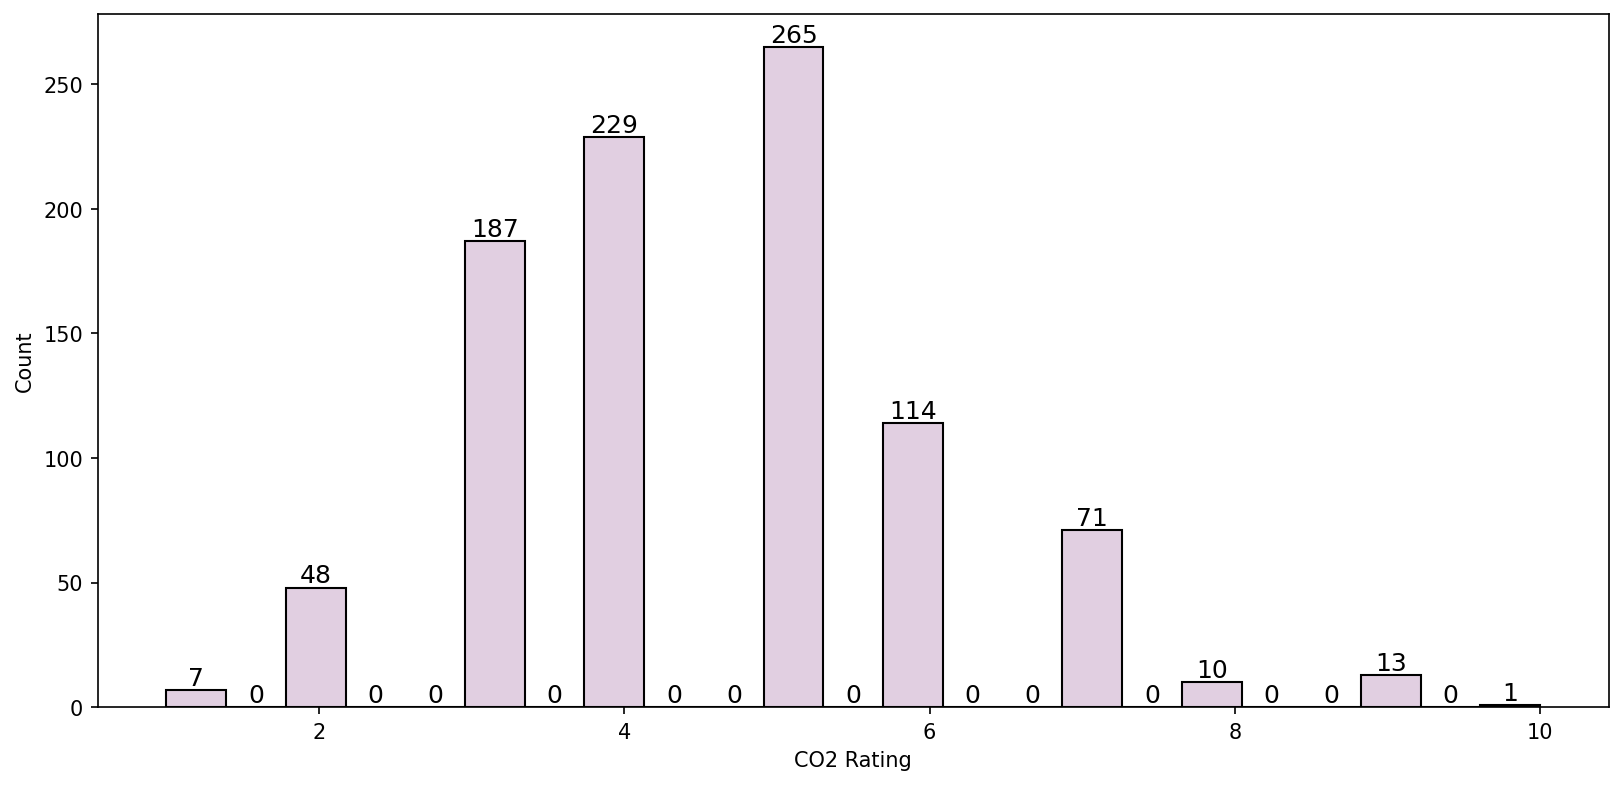

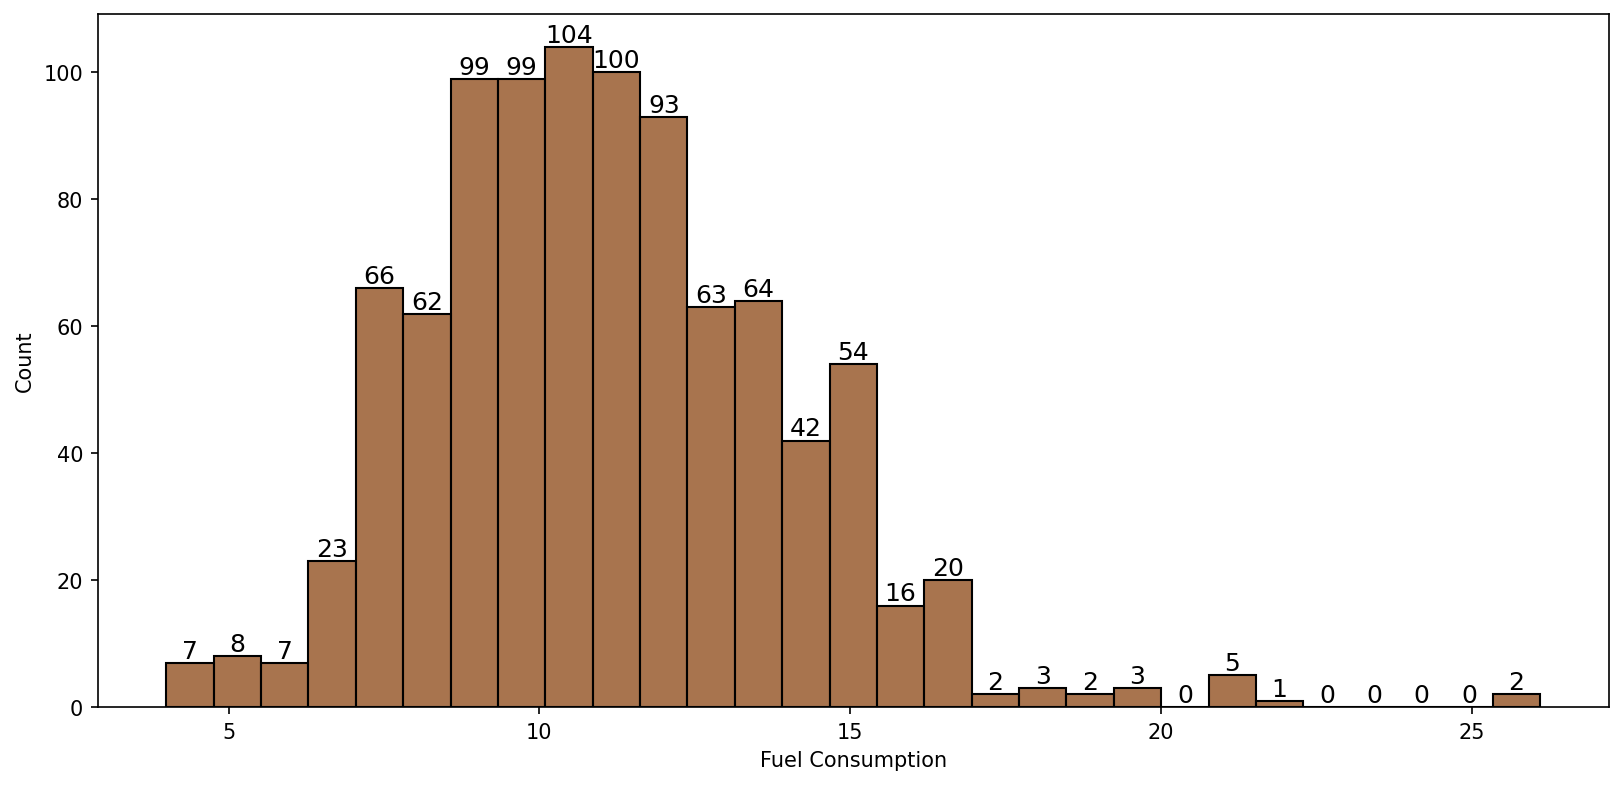

In [23]:
column_set = ['Cylinders','Engine Size','CO2 Rating','Fuel Consumption']
color_set = ['grey','brown','Thistle', 'SaddleBrown']
for colors,col in zip(color_set,column_set):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

## Comparison between "No. of cylinders" & "Fuel consumption"


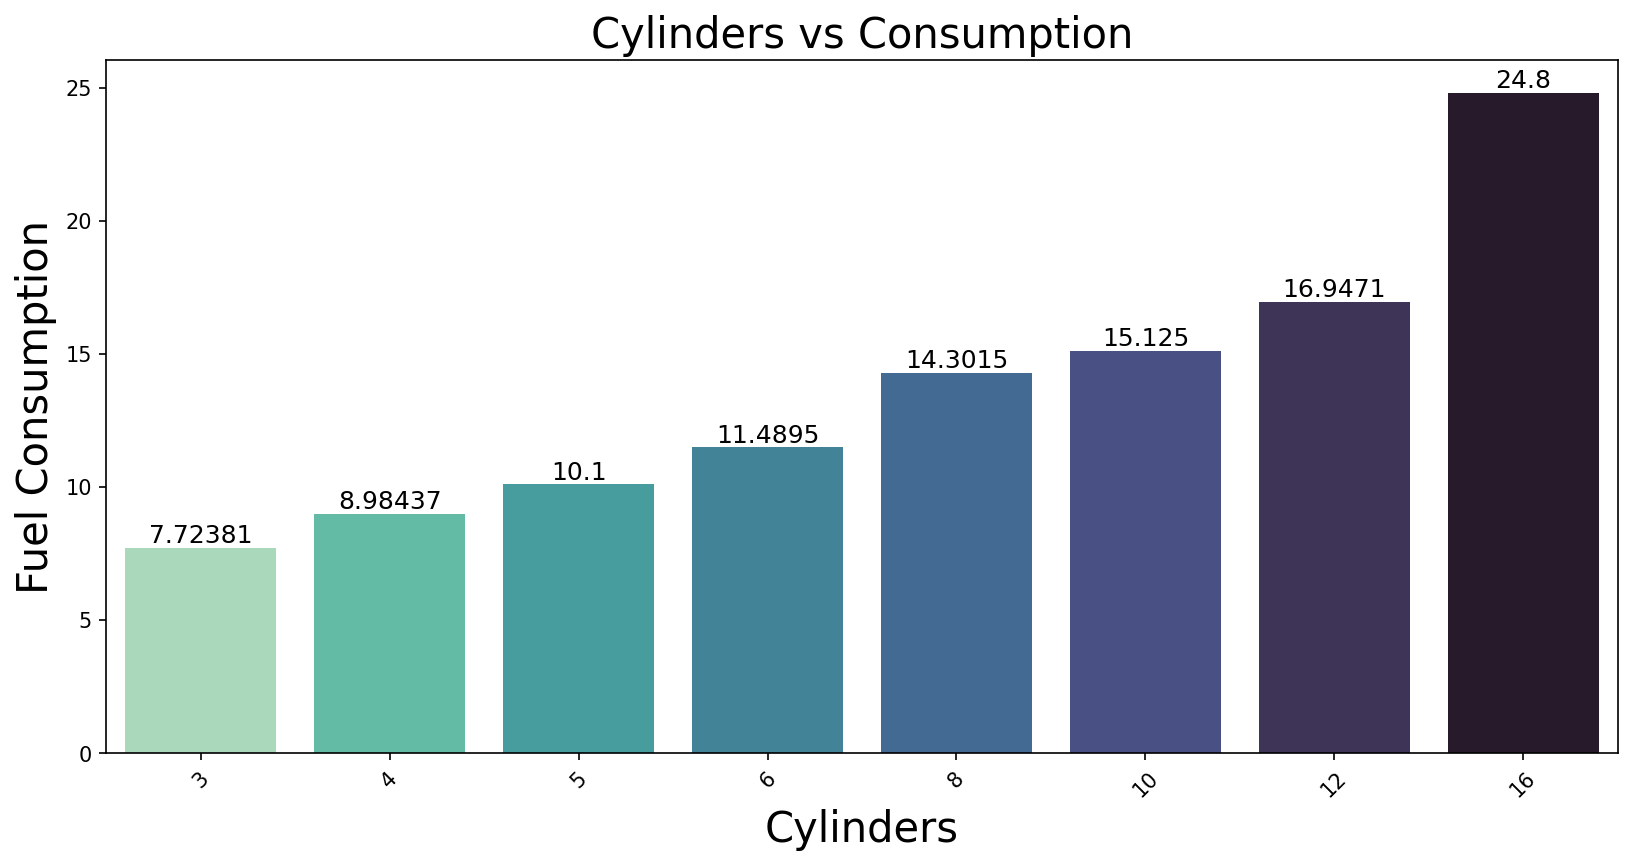

In [24]:
plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='mako_r', ci=None)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

## 4.4 Heatmap showing "Pearson correlation" :
<span id="heatcorr"></span>


<AxesSubplot:>

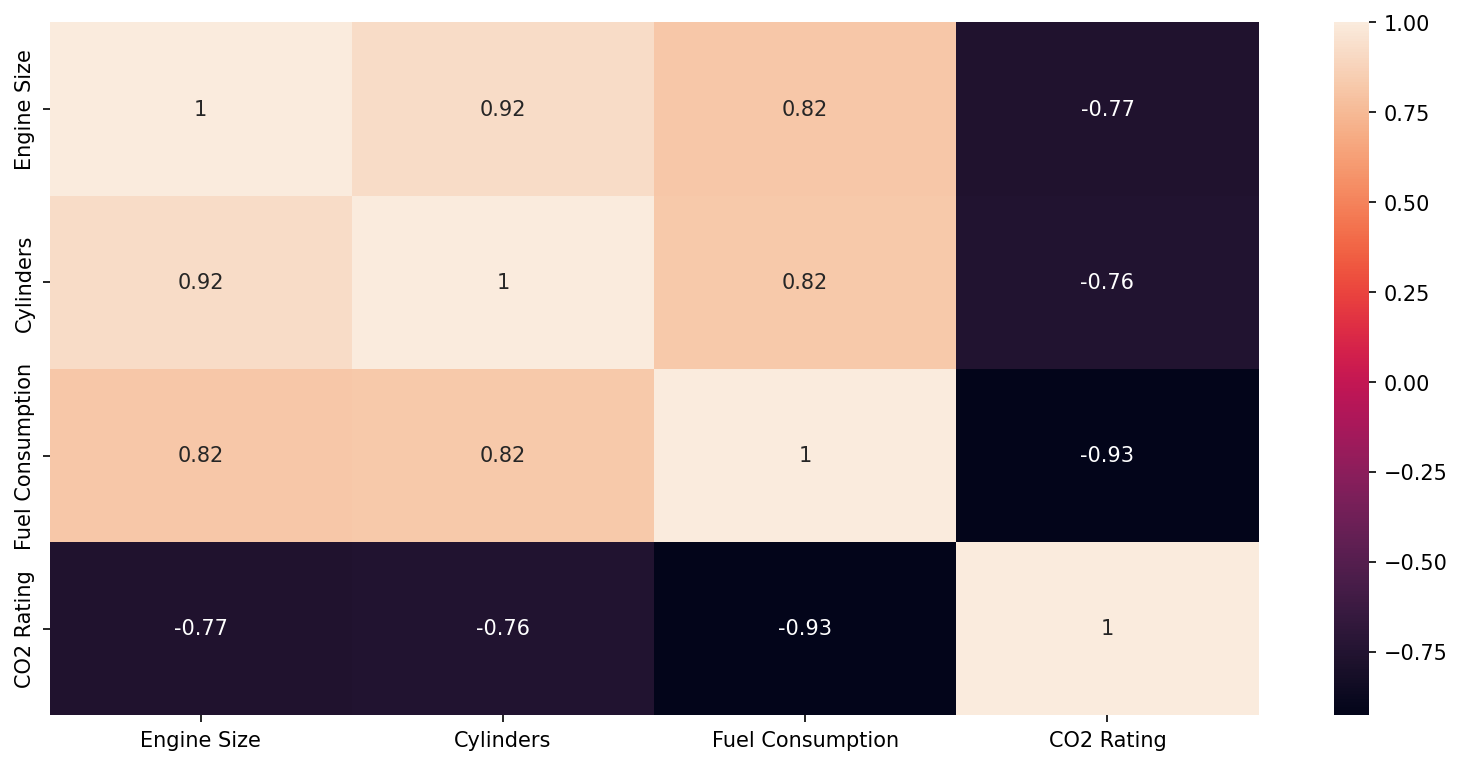

In [25]:
plt.figure(figsize=(13,6), dpi=150)
sns.heatmap(df.corr(),annot=True)

# Performing Chi Square analysis:-


## Transmission and Fuel Type:

In [26]:
# from scipy.stats import chi2_contingency
fuel_type= pd.crosstab(df['Transmission'],df['Fuel Type'])

In [27]:
fuel_type

Fuel Type,D,E,X,Z
Transmission,,,,
A,28,6,141,87
AM,0,0,25,107
AS,0,8,150,207
AV,0,0,87,9
M,0,0,41,49


In [28]:
Chi_square_statistic,p,dof,expec = chi2_contingency(fuel_type)

In [29]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 3.762904200058271e-41
Dependent
dof is 12


## Transmission and Vehicle Class:

In [30]:
Class=pd.crosstab(df['Transmission'],df['Vehicle Class'])

In [31]:
Class

Vehicle Class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater
Transmission,,,,,,,,,,,,,,
A,3,16,18,3,3,15,74,47,67,4,1,0,10,1
AM,8,18,12,25,0,1,0,16,0,0,2,8,16,26
AS,34,19,46,4,2,1,38,91,69,8,4,2,34,13
AV,11,9,22,0,2,1,0,36,5,0,1,7,2,0
M,13,2,19,16,0,2,1,7,0,0,0,2,17,11


In [32]:
Chi_square_statistic,p,dof,expec = chi2_contingency(Class)

In [33]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 3.356375805194314e-79
Dependent
dof is 52



<h1 style="font-size: 40px; font-family: serif;">Data Preprocessing</h1>





# Outlier 


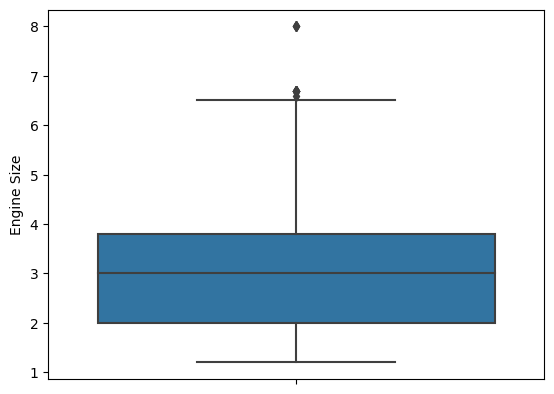

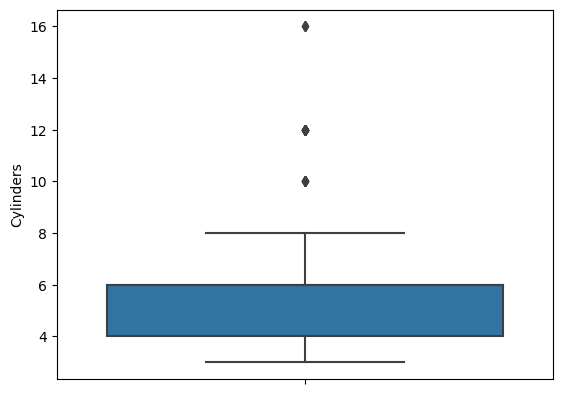

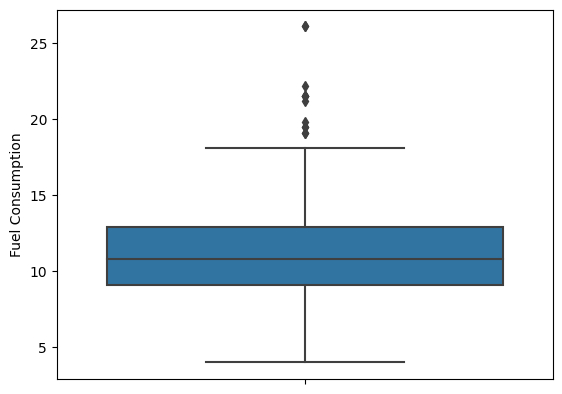

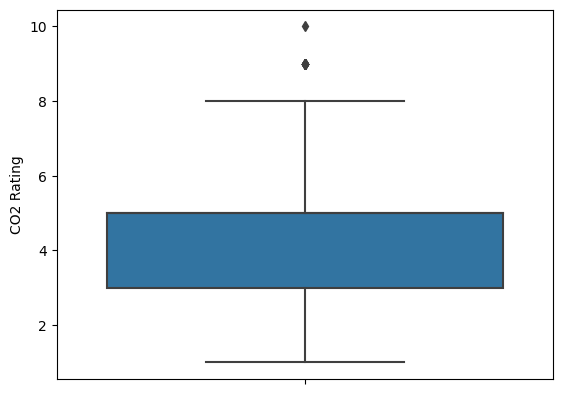

In [34]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

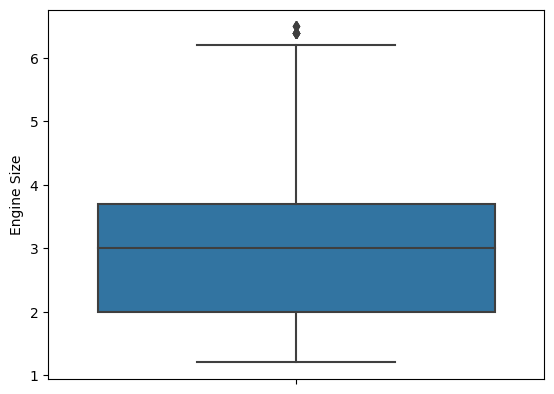

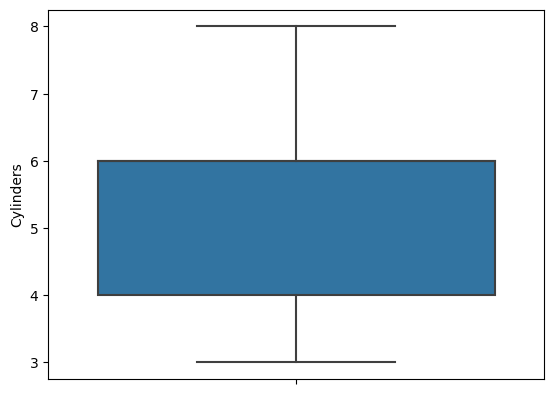

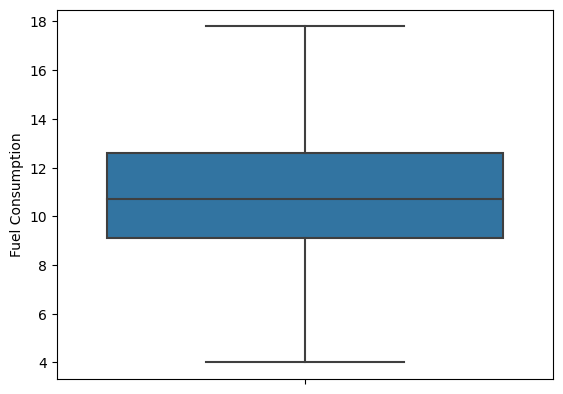

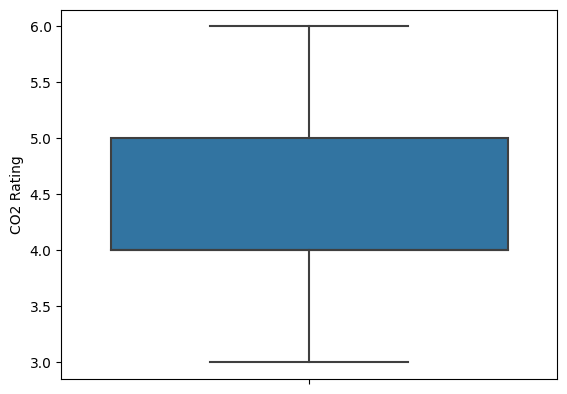

In [35]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)

In [36]:
df.shape

(782, 7)

##  Ordinal encoding


In [37]:
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

order = ['AV', 'AM', 'M', 'AS', 'A']

od = OrdinalEncoder(categories = [order])

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])

In [38]:
order = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan',\
         'Station wagon: Small','Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle',\
         'Pickup truck: Standard']

od = OrdinalEncoder(categories = [order])

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle Class"]])

In [39]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X
0,Compact,2.4,4,AM,Z,8.6,6.0,1.0,2.0
1,SUV: Small,3.5,6,AS,Z,11.2,4.0,3.0,6.0
2,SUV: Small,2.0,4,AS,Z,9.9,5.0,3.0,6.0
3,SUV: Small,2.0,4,AS,Z,10.3,5.0,3.0,6.0
4,Compact,2.0,4,AS,Z,9.8,5.0,3.0,2.0


## One Hot encoding on categorical columns


In [40]:
new_df = df['Fuel Type'].str.get_dummies()

In [41]:
new_df

,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
940,0,0,0,1
941,0,0,0,1
942,0,0,0,1
943,0,0,0,1


In [42]:
df= pd.concat([df,new_df], axis =1)

In [43]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,Compact,2.4,4,AM,Z,8.6,6.0,1.0,2.0,0,0,0,1
1,SUV: Small,3.5,6,AS,Z,11.2,4.0,3.0,6.0,0,0,0,1
2,SUV: Small,2.0,4,AS,Z,9.9,5.0,3.0,6.0,0,0,0,1
3,SUV: Small,2.0,4,AS,Z,10.3,5.0,3.0,6.0,0,0,0,1
4,Compact,2.0,4,AS,Z,9.8,5.0,3.0,2.0,0,0,0,1


## Split Into Train and Test 


In [44]:
x = df.drop(["Fuel Type",'Fuel Consumption',"Vehicle Class","Transmission"], axis = 1)

In [45]:
x.head()

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,2.4,4,6.0,1.0,2.0,0,0,0,1
1,3.5,6,4.0,3.0,6.0,0,0,0,1
2,2.0,4,5.0,3.0,6.0,0,0,0,1
3,2.0,4,5.0,3.0,6.0,0,0,0,1
4,2.0,4,5.0,3.0,2.0,0,0,0,1


In [46]:
y= df['Fuel Consumption']

In [47]:
y.head().to_frame()

,Fuel Consumption
0,8.6
1,11.2
2,9.9
3,10.3
4,9.8


In [48]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.25 , random_state= 51)

In [49]:
xtrain

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
524,3.0,6,5.0,4.0,6.0,1,0,0,0
579,5.0,8,4.0,3.0,7.0,0,0,0,1
336,3.5,6,5.0,3.0,13.0,0,0,1,0
155,3.0,6,4.0,3.0,4.0,0,0,0,1
859,2.4,4,5.0,0.0,6.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
631,2.0,4,6.0,3.0,2.0,0,0,1,0
834,5.7,8,3.0,4.0,13.0,0,0,1,0
872,2.5,4,6.0,3.0,4.0,0,0,1,0
584,3.5,6,5.0,3.0,4.0,0,0,1,0


## Scaling


In [50]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
xtrain = sc.fit_transform(xtrain)

In [52]:
xtrain

array([[-0.15350414,  0.26173852,  0.60377555, ..., -0.07173421,
        -0.87467722, -1.04897971],
       [ 1.46727829,  1.55607414, -0.3928793 , ..., -0.07173421,
        -0.87467722,  0.95330729],
       [ 0.25169147,  0.26173852,  0.60377555, ..., -0.07173421,
         1.14327889, -1.04897971],
       ...,
       [-0.55869974, -1.0325971 ,  1.6004304 , ..., -0.07173421,
         1.14327889, -1.04897971],
       [ 0.25169147,  0.26173852,  0.60377555, ..., -0.07173421,
         1.14327889, -1.04897971],
       [ 0.65688708,  1.55607414, -0.3928793 , ..., -0.07173421,
        -0.87467722,  0.95330729]])

In [53]:
xtest = sc.transform(xtest)

In [54]:
xtest

array([[ 0.25169147,  0.26173852, -0.3928793 , ..., -0.07173421,
         1.14327889, -1.04897971],
       [ 0.33273059,  0.26173852,  0.60377555, ..., -0.07173421,
         1.14327889, -1.04897971],
       [ 0.65688708,  1.55607414, -1.38953415, ..., -0.07173421,
        -0.87467722,  0.95330729],
       ...,
       [-0.96389535, -1.0325971 ,  0.60377555, ..., -0.07173421,
         1.14327889, -1.04897971],
       [-0.23454326,  0.26173852, -0.3928793 , ..., -0.07173421,
        -0.87467722,  0.95330729],
       [-0.55869974, -1.0325971 ,  1.6004304 , ..., -0.07173421,
         1.14327889, -1.04897971]])

-----
<center>
<h1 style="font-size: 40px; font-family: serif;"> Training Models</h1>
</center>
<span id="model"></span>

---

# Linear Regression


In [55]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [56]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [57]:
lr.intercept_

11.12160872039636

**Checking if model is overfitted or underfitted**

In [58]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.9263988971363971
testing score =  0.9193576516644216


In [59]:
ypred = lr.predict(xtest)

In [60]:
r2_score(ytest, ypred)

0.9193576516644216

# Decision Tree Regressor



In [61]:
# from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(max_depth=4)

In [62]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [63]:
ypred=dc.predict(xtest)

**Checking if model is overfitted or underfitted**

In [64]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9317982511143293
testing score =  0.8573248570717543


In [65]:
r2_score(ytest, ypred)

0.8573248570717543

**Visualising the tree**

In [66]:
from sklearn import tree

In [67]:
new = df[["Vehicle Class","Engine Size","Cylinders","Transmission","Fuel Type","CO2 Rating"]]

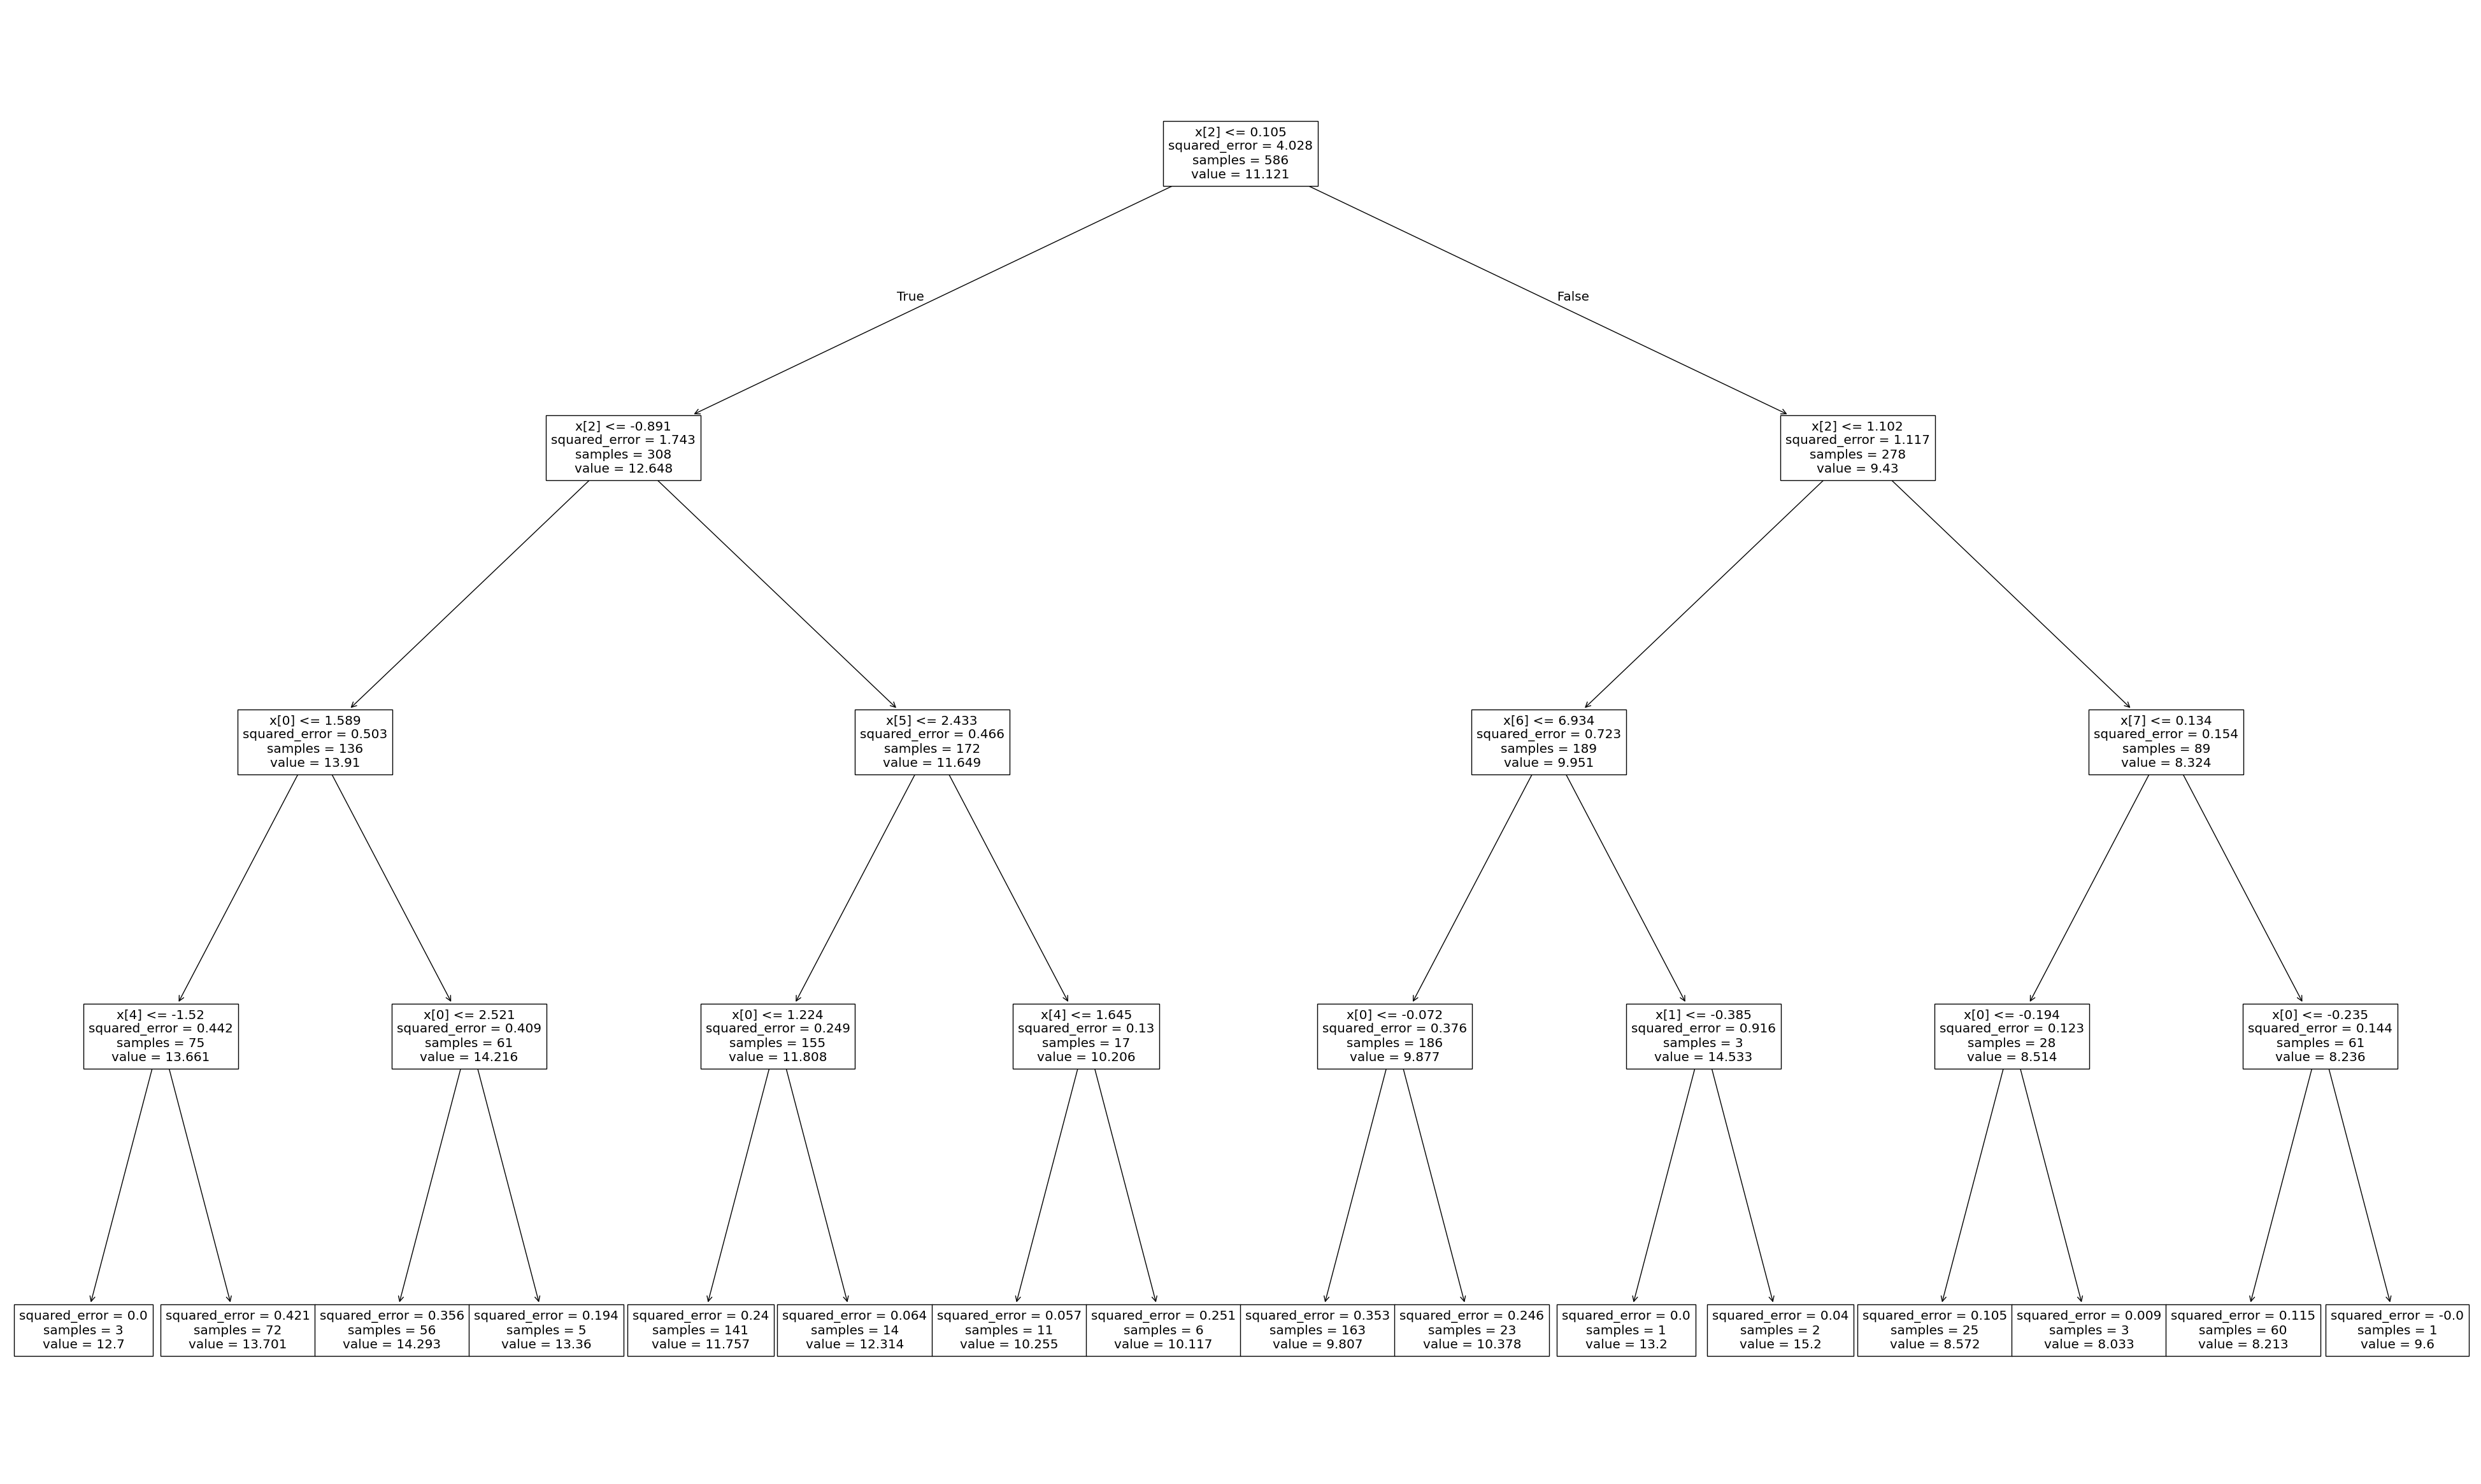

In [68]:
plt.figure(figsize=(50,30))
tree.plot_tree(dc)
plt.show()

# Random Forest Regressor


In [69]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [70]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [71]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

### Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [73]:
rscv.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'criterion': 'poisson'}

In [74]:
rf = RandomForestRegressor(n_estimators = 60 , min_samples_split = 4, max_features =  'sqrt', max_depth = 10, criterion='squared_error')

In [75]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

**Checking if model is overfitted or underfitted**

In [76]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9643506914213507
testing score =  0.8878597955797997


In [77]:
r2_score(ytest,ypred)

0.8878597955797997

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">Model Deployment</h1>
</center>
<span id="deployment"></span>

---

In [78]:
import os
import pickle as pk

In [79]:
filename = "scaled_data.sav"
pk.dump(sc, open(filename, "wb")) #write binary = wb
loaded_scaler = pk.load(open("scaled_data.sav", "rb")) #read binary = rb

In [80]:
filename = "trained_model_lr.sav"
pk.dump(lr, open(filename, "wb"))
loaded_model = pk.load(open("trained_model_lr.sav", "rb"))

In [81]:
trail_inputs = ["Compact",2.4,4,"AV",6.0,"X"]    # input example

In [82]:
def input_converter(trail_inputs):
    vcl = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan','Station wagon: Small','Station wagon: Mid-size','Pickup truck: Small','Special purpose vehicle','Pickup truck: Standard']
    trans = ['AV','AM','M','AS','A']
    fuel = ["D","E","X","Z"]
    lst = []
    for i in range(9):
        if(type(trail_inputs[i]) == str):
            if(trail_inputs[i] in vcl):
                lst.append(vcl.index(trail_inputs[i]))
            elif(trail_inputs[i] in trans):
                lst.append(trans.index(trail_inputs[i]))
            elif(trail_inputs[i] in fuel):
                if(fuel.index(trail_inputs[i]) == 0):
                    lst.extend([1,0,0,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 1):
                    lst.extend([0,1,0,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 2):
                    lst.extend([0,0,1,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 3):
                    lst.extend([0,0,0,1])
        else:
            lst.append(trail_inputs[i])

    arr = np.asarray(lst)
    arr = arr.reshape(1, -1)
    arr = loaded_scaler.transform(arr)
    prediction = loaded_model.predict(arr)
    
    return(f"The Fuel Consumption L/100km is {round(prediction[0],2)}")



input_converter(trail_inputs)

'The Fuel Consumption L/100km is 11.33'